<a href="https://colab.research.google.com/github/rioAgustian/Fisika-Komputasi/blob/main/free_fall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gerak Benda Jatuh dengan Hambatan Udara

Persamaan gerak
  
\begin{align}
\frac{d^2y}{dt^2}=\frac{C_d\rho A v^2}{2m}-g
\end{align}

Atau, dapat disderhanakan menjadi
\begin{align}
\frac{dv}{dt}=kv^2 - g
\end{align}
Dengan

$C_d$ = koefisien hambatan udara 

$A$ = luas penampang lintang

$\rho$ = massa jenis udara sekitar

$v$ = kecepatan benda

$k = \frac{C_d\rho A}{2m} $

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [9]:
# parameter
r = 7.5e-3      # m
A = np.pi*r**2  # m^2
rho = 1.2       # kg/m^3
cd = 0.46       # dimensionless
g = 9.8         # m/s^2
m = 3.9e-3      # kg

# merapikan parameter
params = (A, cd, g, m)

In [10]:
# model persamaan diferensial
def dSdt(t, S, A, cd, g, m, ):
  k = (cd*rho*A)/(2*m)
  y, v = S
  return [v,
          k*v**2 - g]

In [19]:
# kondisi awal
y0 = 2000 # m
v0 = 0    # m/s; jatuh bebas

# merapikan kondisi awal
S0 = (y0, v0)

# pewaktuan
min_t = 0
max_t = 15

In [30]:
# menggunakan solve_ivp
sol = solve_ivp(dSdt, t_span=(min_t, max_t), y0=S0, args=params, rtol=10e-10)

# solusi
t = sol.t
y = sol.y[0]
v = sol.y[1]

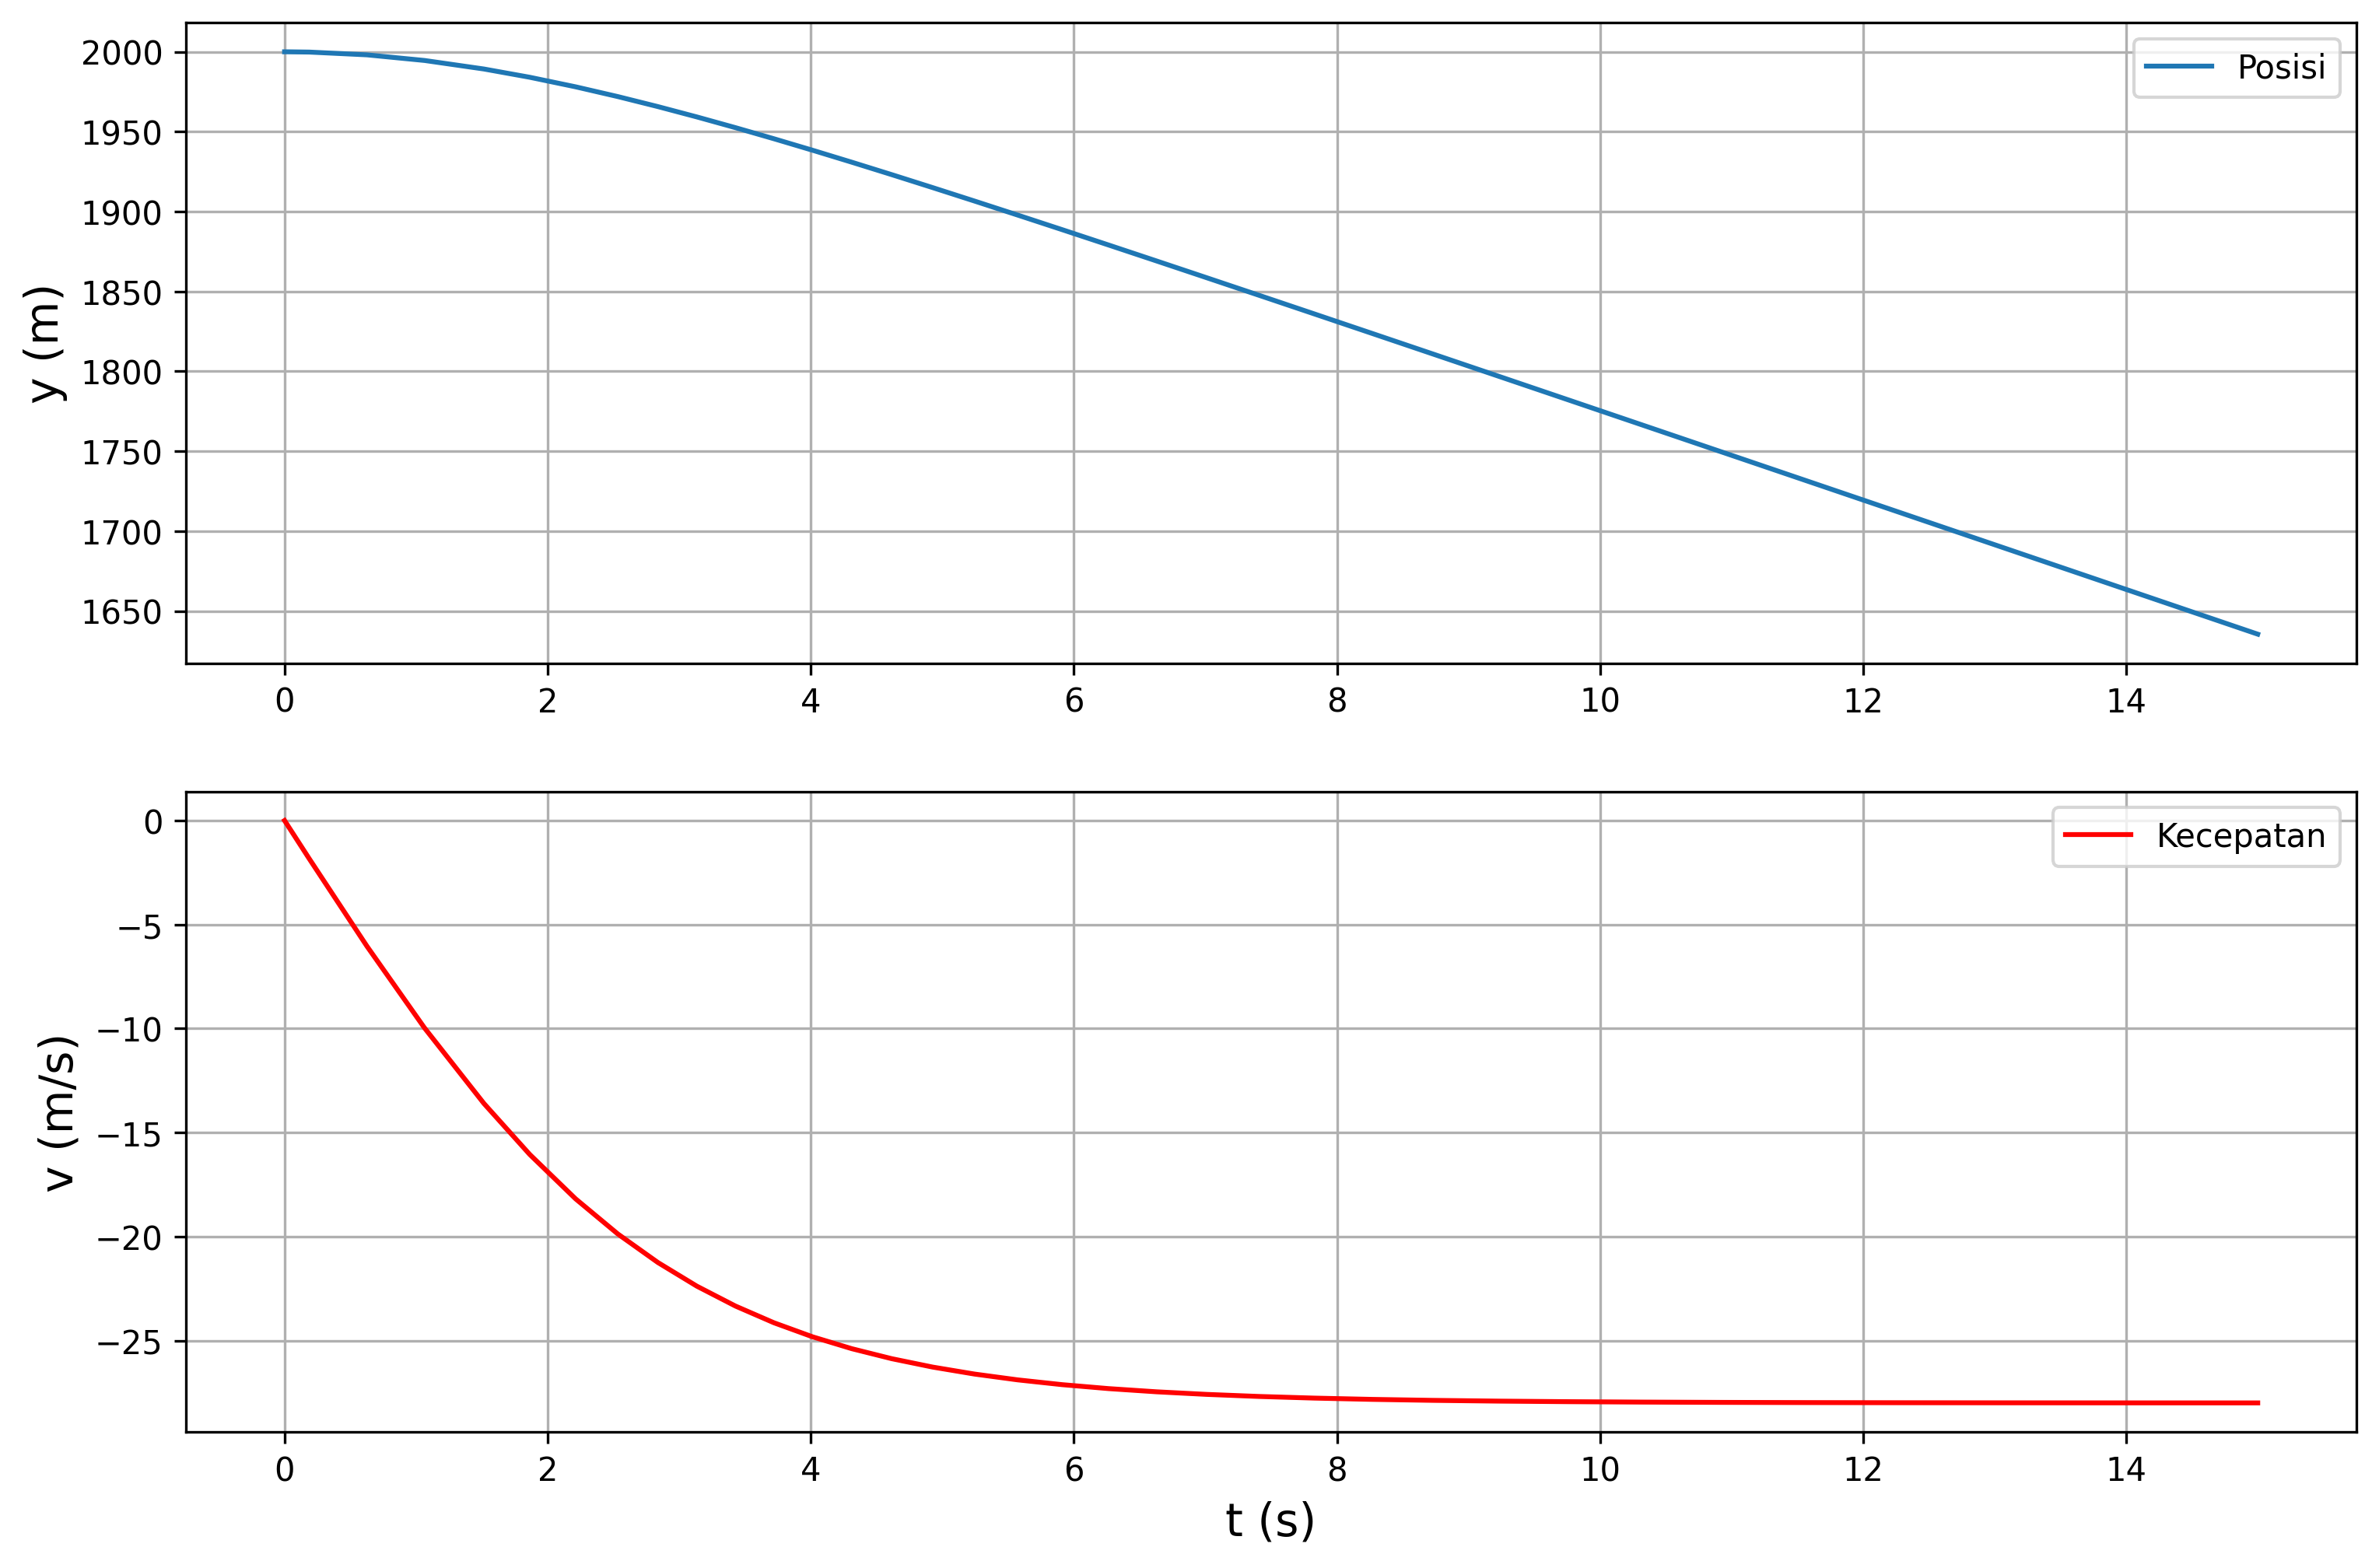

In [54]:
# plotting
fig = plt.figure(dpi=300, figsize=(12, 8))

# 1st plot
ax1 = fig.add_subplot(211)
ax1.plot(t, y, label="Posisi")
ax1.set_ylabel("y (m)", fontsize=14)
ax1.legend()
ax1.grid()


# 2nd plot
ax2 = fig.add_subplot(212, sharex=ax1)
ax2.plot(t, v, "r", label="Kecepatan")
ax2.set_xlabel("t (s)", fontsize=14)
ax2.set_ylabel("v (m/s)", fontsize=14)
ax2.legend()
ax2.grid()

# plt.tight_layout()
plt.show()